In [2]:
import numpy as np
import sys  
sys_path="d:\\software\\python3\\lib\\site-packages"
sys.path.append(sys_path)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima_model import ARMA


In [5]:
dta = sm.datasets.sunspots.load_pandas().data
print(type(dta))
dta



<class 'pandas.core.frame.DataFrame'>


,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [6]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
dta.index.freq = dta.index.inferred_freq

<AxesSubplot:>

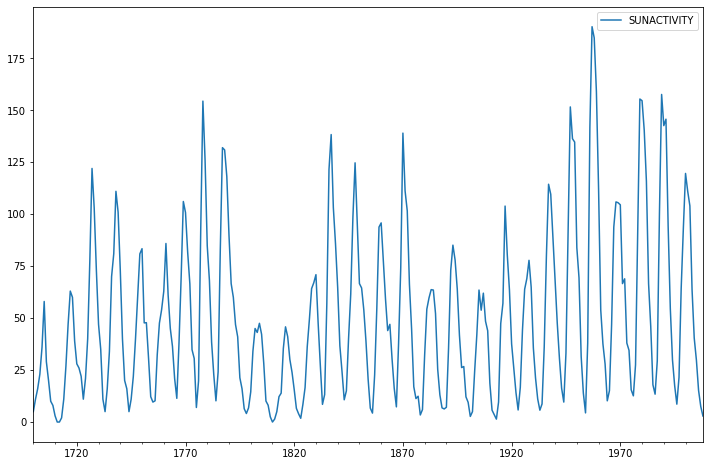

In [3]:
del dta["YEAR"]
dta.plot(figsize=(12, 8))

In [4]:
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()
print(arma_mod20.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1307.319
Date:                Thu, 30 Nov 2023   AIC                           2622.637
Time:                        10:28:57   BIC                           2637.570
Sample:                    12-31-1700   HQIC                          2628.607
                         - 12-31-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7462      3.938     12.631      0.000      42.027      57.465
ar.L1          1.3906      0.037     37.694      0.000       1.318       1.463
ar.L2         -0.6886      0.036    -19.363      0.0

In [5]:
print(arma_mod20.aic,arma_mod20.bic)
print(arma_mod20.params)

2622.637093301154 2637.570458408745
const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727182
dtype: float64


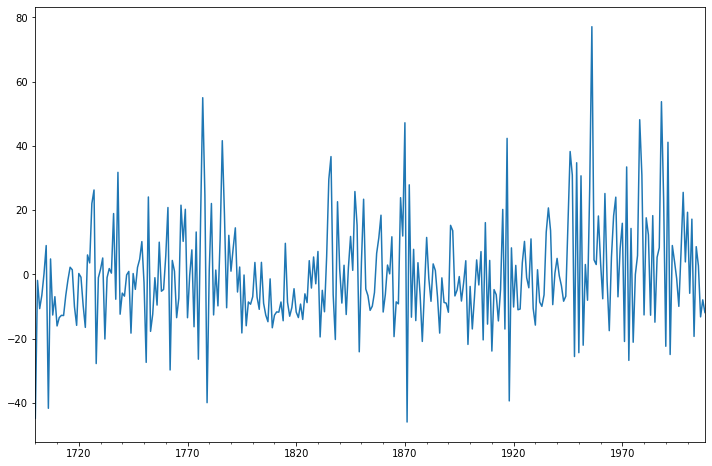

In [6]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax)

In [7]:
print(arma_mod20.predict("2009","2050",dynamic=True))


2009-12-31    13.689923
2010-12-31    31.862180
2011-12-31    49.703468
2012-12-31    62.001227
2013-12-31    66.817867
2014-12-31    65.048140
2015-12-31    59.270493
2016-12-31    52.454493
2017-12-31    46.954271
2018-12-31    43.998793
2019-12-31    43.676114
2020-12-31    45.262447
2021-12-31    47.690641
2022-12-31    49.975063
2023-12-31    51.479866
2024-12-31    51.999503
2025-12-31    51.685962
2026-12-31    50.892132
2027-12-31    50.004103
2028-12-31    49.315790
2029-12-31    48.970072
2030-12-31    48.963259
2031-12-31    49.191837
2032-12-31    49.514395
2033-12-31    49.805564
2034-12-31    49.988367
2035-12-31    50.042089
2036-12-31    49.990922
2037-12-31    49.882777
2038-12-31    49.767619
2039-12-31    49.681942
2040-12-31    49.642092
2041-12-31    49.645669
2042-12-31    49.678084
2043-12-31    49.720698
2044-12-31    49.757638
2045-12-31    49.779666
2046-12-31    49.784862
2047-12-31    49.776920
2048-12-31    49.762299
2049-12-31    49.747433
2050-12-31    49

In [8]:
import statsmodels.tsa.stattools as st

order_analyze = st.arma_order_select_ic(dta, max_ar=8, max_ma=5, ic=['aic'])
print(order_analyze)
print(order_analyze.aic_min_order)

D:\Software\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Software\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Software\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Software\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Software\Anaconda\lib\site-packages\statsmodels\base\model.py:604: Convergence

{'aic':              0            1            2            3            4  \
0  3166.583223  2886.900670  2724.808961  2677.218662  2650.597404   
1  2819.169153  2713.226344  2662.370189  2655.644443  2679.404993   
2  2622.637093  2620.277193  2620.872850  2622.851811  2604.759323   
3  2619.403629  2620.122161  2622.121330  2624.112180  2576.087555   
4  2620.478848  2622.121289  2619.374497  2617.839443  2575.927949   
5  2622.477731  2624.108528  2617.242953  2619.534907  2624.188473   
6  2615.730042  2585.909745  2572.685663  2607.246694  2602.809003   
7  2601.707945  2579.918341  2574.579604    24.000000  2578.872633   
8  2588.404136  2577.677867  2583.792156  2586.371873  2577.511913   

             5  
0  2645.650557  
1  2654.180729  
2  2602.316259  
3  2573.363460  
4  2575.359226  
5  2577.339299  
6  2570.073332  
7  2575.012123  
8  2569.326457  , 'aic_min_order': (7, 3)}
(7, 3)


D:\Software\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
print(type(order_analyze))


<class 'statsmodels.tools.tools.Bunch'>


D:\Software\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


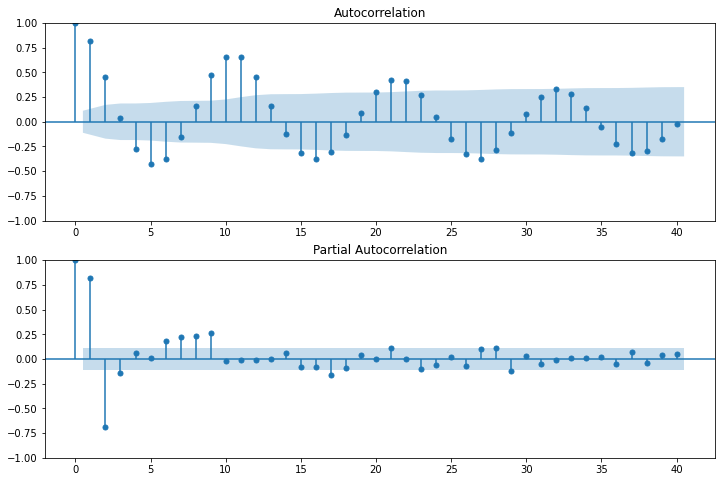

In [12]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)